<a href="https://colab.research.google.com/github/SaiSakethAluru/Pneumonia-Detection/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install  keras==2.2.4

     |████████████████████████████████| 317kB 2.8MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import pandas as pd
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

In [ ]:
TRAIN_DIR = '/content/drive/My Drive/Deep Learning Term Project/ChestXRay2017/chest_xray/train/'
TEST_DIR = '/content/drive/My Drive/Deep Learning Term Project/ChestXRay2017/chest_xray/test/'
PATH = '/content/drive/My Drive/Deep Learning Term Project/'

In [ ]:
IMAGE_HEIGHT = 150
IMAGE_WIDTH = 150
INPUT_CHANNELS = 3

In [ ]:
# import glob
# for file in glob.glob(TRAIN_DIR+'PNEUMONIA/*(*'):
#   os.remove(file)
# for file in glob.glob(TRAIN_DIR+'NORMAL/*(*'):
#   os.remove(file)
# for file in glob.glob(TEST_DIR+'PNEUMONIA/*(*'):
#   os.remove(file)
# for file in glob.glob(TEST_DIR+'NORMAL/*(*'):
#   os.remove(file)

In [ ]:
print(len(os.listdir(os.path.join(TRAIN_DIR,'PNEUMONIA'))))
print(len(os.listdir(os.path.join(TRAIN_DIR,'NORMAL'))))
print(len(os.listdir(os.path.join(TEST_DIR,'PNEUMONIA'))))
print(len(os.listdir(os.path.join(TEST_DIR,'NORMAL'))))

3883
1349
390
234


In [ ]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH, INPUT_CHANNELS),anti_aliasing=True)
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y


In [ ]:
# X_train, y_train = get_data(TRAIN_DIR)

In [ ]:
# X_train = np.load(os.path.join(PATH,'X_train.npy'))
y_train = np.load(os.path.join(PATH,'y_train.npy'))
# X_test = np.load(os.path.join(PATH,'X_test.npy'))
y_test = np.load(os.path.join(PATH,'y_test.npy'))
# X_val = np.load(os.path.join(PATH,'X_val.npy'))
y_val = np.load(os.path.join(PATH,'y_val.npy'))

In [ ]:
np.unique(y_val[:,1],return_counts=True)

(array([0., 1.], dtype=float32), array([270, 777]))

In [ ]:
# X_test , y_test = get_data(TEST_DIR)

In [ ]:
# np.save('/content/drive/My Drive/Deep Learning Term Project/X_train.npy',X_train)
# np.save('/content/drive/My Drive/Deep Learning Term Project/y_train.npy',y_train)
# np.save('/content/drive/My Drive/Deep Learning Term Project/X_test.npy',X_test)
# np.save('/content/drive/My Drive/Deep Learning Term Project/y_test.npy',y_test)

In [ ]:
y_test.shape

(624, 2)

In [ ]:
from keras.utils.np_utils import to_categorical

# y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

In [ ]:
def plotter(i):
    imagep1 = cv2.imread("{0}{1}{2}".format(TRAIN_DIR, "PNEUMONIA/", Pimages[i]))
    imagep1 = skimage.transform.resize(imagep1, (IMAGE_HEIGHT, IMAGE_WIDTH, INPUT_CHANNELS) , mode = 'reflect',anti_aliasing=True)
    imagen1 = cv2.imread("{0}{1}{2}".format(TRAIN_DIR, "NORMAL/", Nimages[i]))
    imagen1 = skimage.transform.resize(imagen1, (IMAGE_HEIGHT, IMAGE_WIDTH, INPUT_CHANNELS), mode = 'reflect',anti_aliasing=True)
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("No Pneumonia Vs Pneumonia")
    print("---------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(5,5))
    plt.imshow(pair)
    plt.show()

In [ ]:
for i in range(4,9):
    plotter(i)


In [ ]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)
plt.title("Plot of the number of samples of each class in the training set")

In [ ]:
count = y_test.sum(axis = 0)
sns.countplot(x = count)
plt.title("Plot of the number of samples of each class in the test set")

In [ ]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=1, verbose=1)

Using TensorFlow backend.


In [ ]:
filepath="weights_batchnorm_1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
import keras
print(keras.__version__)

2.2.4


In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
X_train.shape

(4185, 150, 150, 3)

In [ ]:
X_train=X_train.reshape(-1,INPUT_CHANNELS,IMAGE_WIDTH,IMAGE_HEIGHT)
X_val = X_val.reshape(-1,INPUT_CHANNELS,IMAGE_WIDTH,IMAGE_HEIGHT)
X_test=X_test.reshape(-1,INPUT_CHANNELS,IMAGE_WIDTH,IMAGE_HEIGHT)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 0)
temp = sss.split(X_train,y_train)
train_ind,val_ind = list(temp)[0]

In [ ]:
y_test.shape

(624, 2)

In [ ]:
train_x = X_train[train_ind]
train_y = y_train[train_ind]
val_x = X_train[val_ind]
val_y = y_train[val_ind]

print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(4185, 150, 150, 3)
(4185, 2)
(1047, 150, 150, 3)
(1047, 2)


In [ ]:
np.save('/content/drive/My Drive/Deep Learning Term Project/X_train.npy',train_x)
np.save('/content/drive/My Drive/Deep Learning Term Project/y_train.npy',train_y)
np.save('/content/drive/My Drive/Deep Learning Term Project/X_val.npy',val_x)
np.save('/content/drive/My Drive/Deep Learning Term Project/y_val.npy',val_y)

In [ ]:
def swish_activation(x):
    return (K.sigmoid(x) * x)

In [ ]:
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [ ]:
# inputs = Input(shape=(3,IMAGE_HEIGHT,IMAGE_WIDTH))

# # First conv block
# x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
# x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = MaxPool2D(pool_size=(2, 2))(x)

# # Second conv block
# x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)

# # Third conv block
# x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)

# # Fourth conv block
# x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
# x = Dropout(rate=0.2)(x)

# # Fifth conv block
# x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
# x = Dropout(rate=0.2)(x)

# # FC layer
# x = Flatten()(x)
# x = Dense(units=512, activation='relu')(x)
# x = Dropout(rate=0.7)(x)
# x = Dense(units=128, activation='relu')(x)
# x = Dropout(rate=0.5)(x)
# x = Dense(units=64, activation='relu')(x)
# x = Dropout(rate=0.3)(x)

# # Output layer
# output = Dense(units=2, activation='softmax')(x)
# model = Model(inputs=inputs, outputs=output)
# # Creating model and compiling
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3, 150, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 150, 150)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 150, 150)      2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 75, 75)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 32, 75, 75)        688       
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 32, 75, 75)        1344      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 75, 75)        300       
__________

In [ ]:
## Model architecture
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(INPUT_CHANNELS,IMAGE_WIDTH,IMAGE_HEIGHT)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 16, 150, 150)      448       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 150, 150)      2320      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 75, 75)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 75, 75)        4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 75, 75)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 32, 37, 37)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 37, 37)        18496     
__________

In [ ]:
batch_size = 1
epochs = 10

import gc
gc.collect()

2015

(4185, 3, 150, 150)

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val , y_val) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

Train on 4185 samples, validate on 1047 samples
Epoch 1/10
4185/4185 [==============================] - 7s 2ms/step - loss: 0.8684 - acc: 0.6636 - val_loss: 0.6670 - val_acc: 0.7421

Epoch 00001: val_acc did not improve from 0.74212
Epoch 2/10
4185/4185 [==============================] - 5s 1ms/step - loss: 0.4444 - acc: 0.7613 - val_loss: 1.0818 - val_acc: 0.7450

Epoch 00002: val_acc improved from 0.74212 to 0.74499, saving model to weights_batchnorm_1.hdf5
Epoch 3/10
4185/4185 [==============================] - 5s 1ms/step - loss: 0.3650 - acc: 0.8440 - val_loss: 0.8138 - val_acc: 0.2636

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00003: val_acc did not improve from 0.74499
Epoch 4/10
4185/4185 [==============================] - 5s 1ms/step - loss: 0.3036 - acc: 0.8800 - val_loss: 0.2686 - val_acc: 0.9035

Epoch 00004: val_acc improved from 0.74499 to 0.90353, saving model to weights_batchnorm_1.hdf5
Epoch 5/10
4185/4185 [================

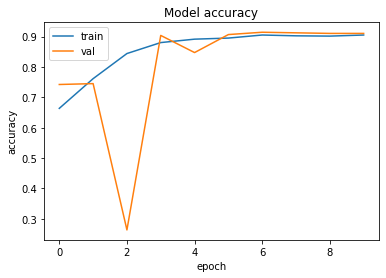

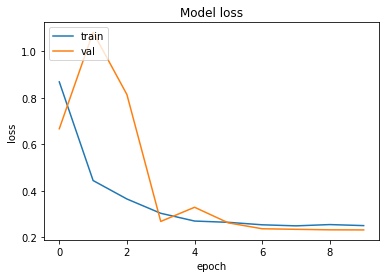

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_test.shape

(624,)

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

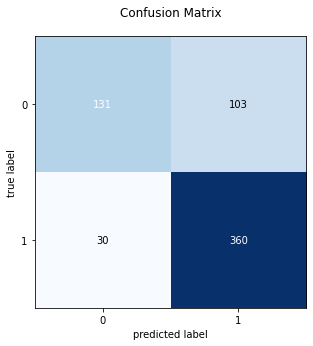

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def get_metric(cm):
    tn, fp, fn, tp = cm.ravel()
    precision = float(tp)/(tp+fp)
    recall = float(tp)/(tp+fn)
    return precision, recall

precision, recall = get_metric(CM)
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
f1_score = 2*(precision*recall)/(precision+recall)
print("F1 score of the model is {:.2f}".format(f1_score))

Recall of the model is 0.92
Precision of the model is 0.78
F1 score of the model is 0.84
